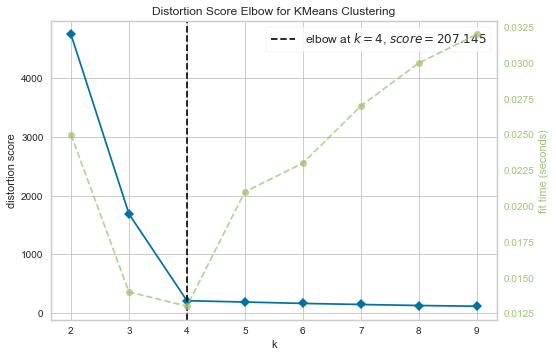

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

X, target = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [2]:
# Best k for model
k = visualizer.elbow_value_
print("k:", k)
model.n_clusters = k
clusters = model.fit_predict(X)

#create a zero matrix with the same shape
labels = np.zeros_like(clusters)
for i in range(k):
    # this is similar to another for loop to check every element of clusters
    # group all the elements of clusters == i, then assign these elements to mask
    mask = (clusters == i)
    labels[mask] = mode(target[mask])[0]
accuracy = accuracy_score(target, labels)
print("Accuracy:", accuracy)

k: 4
Accuracy: 1.0


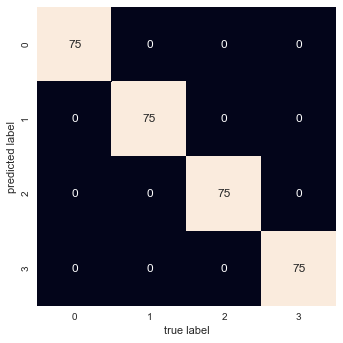

In [3]:
mat = confusion_matrix(target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2,3],
            yticklabels=[0,1,2,3])
plt.xlabel('true label')
plt.ylabel('predicted label');

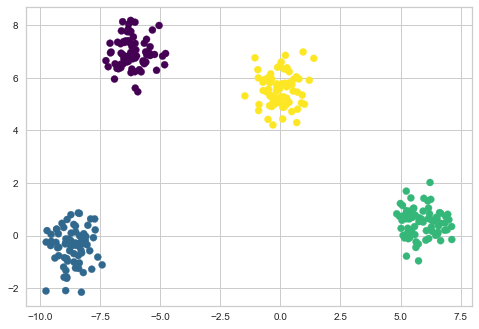

In [4]:
# Plot the actual clusters
plt.scatter(X[:, 0], X[:, 1], c=target, s=50, cmap='viridis')

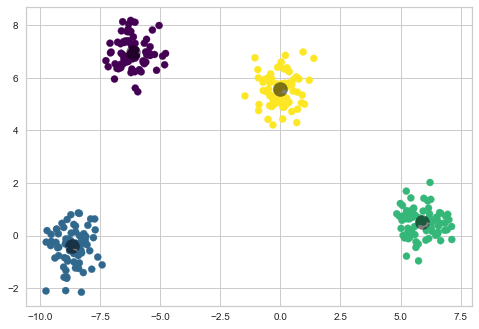

In [5]:
# Plot the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# predicted centroids
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);